In [55]:
#class for data points
#each point have x y values and classifier 1/-1
#each point have distance function that get array of
#points and exp and calculate the euclidian distance from each point

class Point:
    def __init__(self,index, x , y , val):
        self.index = index
        self.x = x
        self.y = y
        self.val = val
        self.distancesFromPoint = []
        
    def __init__(self,arr):
        self.index = arr[0]
        self.x = arr[1]
        self.y = arr[2]
        self.val = arr[3]
        self.distancesFromPoint = []
    
    def distances(self,points,exp):
        self.distancesFromPoint = []
        for i in range(len(points)):
            p2 = points[i]
            if(exp == float("inf")):
                self.distancesFromPoint.append([p2.index,p2.val,max(abs(self.x-p2.x),abs(self.y-p2.y))])
            if(exp ==2):
                self.distancesFromPoint.append([p2.index,p2.val,(( (self.x-p2.x)**exp + (self.y-p2.y)**exp )**(1/exp) )])
            if(exp == 1):
                self.distancesFromPoint.append([p2.index,p2.val,( (abs(self.x-p2.x)) + (abs(self.y-p2.y)) )])
            
        self.distancesFromPoint = sorted(self.distancesFromPoint,key=lambda x: x[2])
    
    
    def __str__(self):
        return ("index: " +str(self.index) + "\nX: " +str(self.x) +"\nY: " + str(self.y) +"\nVAL: " + str(self.val)+
               "\nDistances: " +str(self.distancesFromPoint))
    

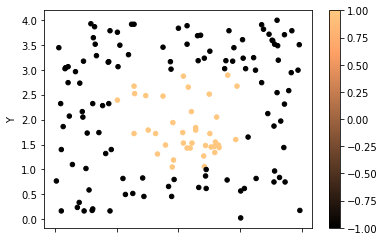

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from itertools import product,combinations
from pandas import merge
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

f = open("rectangle.txt")

data = pd.read_csv("rectangle.txt", sep=" ", header=None)
data.columns = ["X", "Y", "VAL"]
pointPlaces = []
pointVal = []

for i in range(data.shape[0]):
    p = Point([i+1]+data.loc[i].tolist())
    pointPlaces.append(p)
    pointVal.append(list([i+1,p.val]))
data.plot.scatter(x="X", y="Y",c=data["VAL"],colormap='copper');


In [58]:
 
def calculateError(trueY,predictedY):
    weight = 1/75
    error = 0
    numoferrors = 0
    for i in range(len(trueY)):
        if(trueY[i][1] != predictedY[i]):
            error+=weight
            numoferrors+=1
    return error

def getMostFreq(lis):
    numberOfPositives = 0
    numberOfNegatives = 0
    
    for i in range(len(lis)):
        if(lis[i][1] == 1.0):
            numberOfPositives+=1
        else:
            numberOfNegatives+=1
    if(numberOfPositives > numberOfNegatives):
        return 1.0
    else:
        return -1.0

In [89]:
inf = float('inf')

empiricalError = 0
trueError = 0
totalEmpiricalErrors = [0 for i in range(15)]
totalTrueErrors = [0 for i in range(15)]

for r in range(0,100):
    trainPoints ,testPoints, trainVal, testVal  = train_test_split(pointPlaces,pointVal ,test_size = 75)

    place = 0
    for k in range(1,10,2):

        for p in [1,2,inf]:
            y_predictTest = []
            y_predictTrain = []
            for point in range(len(testPoints)):
                #calculate the distance from each test point to all train points
                testPoints[point].distances(trainPoints,p)
                
                #taking the k nearest neighbours and return the most frequent val from the points,
                #add that value to prediction
                y_predictTest.append(getMostFreq(testPoints[point].distancesFromPoint[:k]))
                
                #calculate the distance from each train point to all train points
                trainPoints[point].distances(trainPoints,p)
                
                #taking the k nearest neighbours and return the most frequent val from the points,
                #add that value to prediction
                y_predictTrain.append(getMostFreq(trainPoints[point].distancesFromPoint[:k]))
            
            #after the prediction and fit we calculate the error for each train/test set
            totalTrueErrors[place] += (round(calculateError(testVal,y_predictTest),3))
            totalEmpiricalErrors[place] += (round(calculateError(trainVal,y_predictTrain),3))
            
            place+=1

print([round(x/100,4) for x in totalEmpiricalErrors ])
print([round(x/100,4) for x in totalTrueErrors ])  


[0.0, 0.0, 0.0, 0.026, 0.0231, 0.0244, 0.0359, 0.0376, 0.0409, 0.045, 0.0494, 0.0545, 0.0535, 0.0622, 0.067]
[0.0634, 0.0584, 0.062, 0.0553, 0.0557, 0.063, 0.0583, 0.0606, 0.0719, 0.0641, 0.0745, 0.0853, 0.0733, 0.0827, 0.0967]


Text(0.5, 1.0, 'Empirical error')

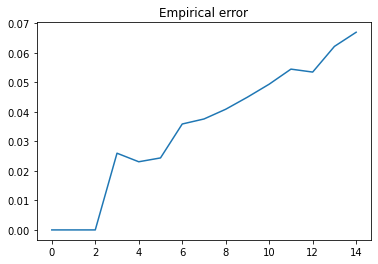

In [90]:
plt.plot([round(x/100,4) for x in totalEmpiricalErrors ])
plt.title("Empirical error")

Text(0.5, 1.0, 'True error')

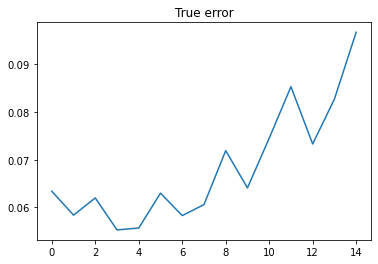

In [91]:
plt.plot([round(x/100,4) for x in totalTrueErrors ])
plt.title("True error")